In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Dense, Activation, Flatten, Reshape
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from keras.utils.vis_utils import plot_model

In [3]:
def preprocess(array):
    '''
    Normalizes the image and reshapes it appropriately.
    '''
    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


def noise(array):
    '''
    Adds random gaussian noise to each image.
    '''

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)

def display(array1, array2):
    '''
    Function to display 10 random images from test set and train set
    '''

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

11501568/11490434 [==============================] - 0s 0us/step


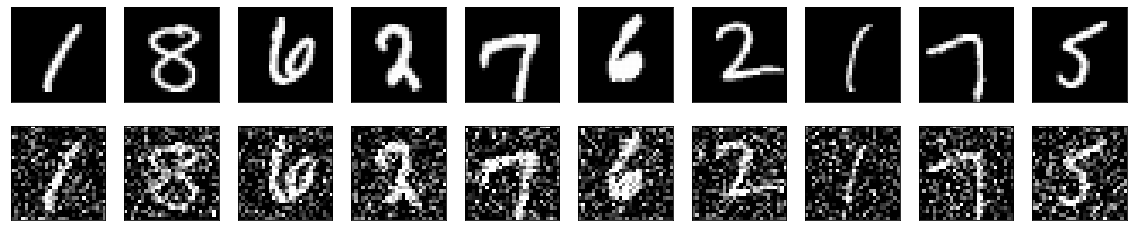

In [4]:
#labels not required as train data will double as the output
(train_data, _), (test_data, _) = mnist.load_data()

#Normalise and reshape
train_data = preprocess(train_data)
test_data = preprocess(test_data)

#Add noise to images
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

#Display a train image along with its noisy version
display(train_data, noisy_train_data)

In [5]:
'''
Dense Autoencoder
'''
input = layers.Input(shape=(28, 28, 1))
# Encoder
x = Flatten()(input)
x = Dense(64)(x)
x = Dense(28*28*1)(x)
x = Reshape((28,28,1))(x)
# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()
#plot_model(autoencoder, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [6]:
'''
Convolutional Autoencoder
'''
#Second model
input = layers.Input(shape=(28, 28, 1))
# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder

x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder2 = Model(input, x)
autoencoder2.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder2.summary()
#plot_model(autoencoder2, to_file='model_plot2.png', show_shapes=True, show_layer_names=True)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)       9248

Epoch 1/50
469/469 [==============================] - 5s 4ms/step - loss: 0.2423 - val_loss: 0.1721
Epoch 2/50
469/469 [==============================] - 2s 3ms/step - loss: 0.1681 - val_loss: 0.1510
Epoch 3/50
469/469 [==============================] - 2s 3ms/step - loss: 0.1777 - val_loss: 0.2425
Epoch 4/50
469/469 [==============================] - 2s 3ms/step - loss: 0.2696 - val_loss: 0.2827
Epoch 5/50
469/469 [==============================] - 2s 3ms/step - loss: 0.2719 - val_loss: 0.2528
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.2436 - val_loss: 0.3136
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 0.2503 - val_loss: 0.2335
Epoch 8/50
469/469 [==============================] - 2s 4ms/step - loss: 0.2157 - val_loss: 0.2103
Epoch 9/50
469/469 [==============================] - 2s 4ms/step - loss: 0.2139 - val_loss: 0.2072
Epoch 10/50
469/469 [==============================] - 2s 3ms/step - loss: 0.2055 - val_loss: 0.1815

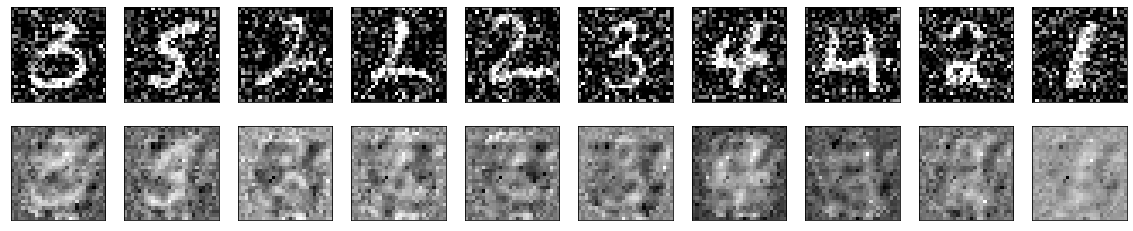

In [7]:
autoencoder.fit(
    x=train_data,
    y=train_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, test_data),
)


predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)

Epoch 1/15
469/469 [==============================] - 15s 9ms/step - loss: 0.1771 - val_loss: 0.1029
Epoch 2/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0996 - val_loss: 0.0959
Epoch 3/15
469/469 [==============================] - 4s 9ms/step - loss: 0.0956 - val_loss: 0.0938
Epoch 4/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0937 - val_loss: 0.0919
Epoch 5/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0923 - val_loss: 0.0912
Epoch 6/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0914 - val_loss: 0.0904
Epoch 7/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0905 - val_loss: 0.0894
Epoch 8/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0899 - val_loss: 0.0890
Epoch 9/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0893 - val_loss: 0.0883
Epoch 10/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0889 - val_loss: 0.08

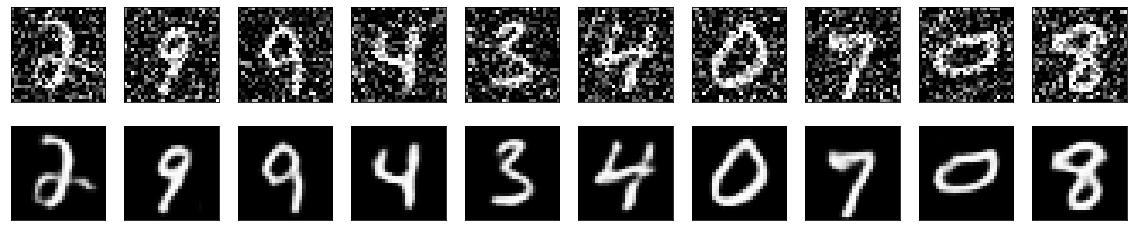

In [8]:
autoencoder2.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=15,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

predictions2 = autoencoder2.predict(noisy_test_data)
display(noisy_test_data, predictions2)